In [56]:
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

import calendar
from datetime import datetime


In [57]:
dfZP = pd.read_csv('../data/train.csv')
dfCodMexIso = pd.read_csv('../data/abreviaturas_iso.csv')


In [58]:
dfZP.head(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [59]:
dfZP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

# Primera Parte - Verificamos datos


In [60]:
dfZP.shape

(240000, 23)

In [61]:
dfZP.dtypes


id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [62]:
dfZP.columns.values

array(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion',
       'ciudad', 'provincia', 'antiguedad', 'habitaciones', 'garages',
       'banos', 'metroscubiertos', 'metrostotales', 'idzona', 'lat',
       'lng', 'fecha', 'gimnasio', 'usosmultiples', 'piscina',
       'escuelascercanas', 'centroscomercialescercanos', 'precio'],
      dtype=object)

In [63]:
#Verificamos datos
print(dfZP['ciudad'].unique())


['Benito Juárez' 'La Magdalena Contreras' 'Tonalá' 'Zinacantepec'
 'Zapopan' 'Coyoacán' 'Oaxaca de Juárez' 'Playa del Carmen'
 'Villa de Alvarez' 'Ixtapaluca' 'San Luis Potosí'
 'San Pedro Garza García' 'Querétaro' 'Naucalpan de Juárez' 'Monterrey'
 'Ciudad Madero' 'Cancún' 'Apodaca' 'Puebla' 'Miguel Hidalgo' 'Mérida'
 'Huixquilucan' 'Emiliano Zapata' 'Tampico' 'Atizapán de Zaragoza'
 'Tlalpan' 'Acapulco de Juárez' 'Iztacalco' 'Villahermosa'
 'Cuautitlán Izcalli' 'Irapuato' 'Epazoyucan' 'Metepec' 'Cuauhtémoc'
 'Alvaro Obregón' 'Tultitlán' 'San Pedro Cholula' 'Venustiano Carranza'
 'Coacalco de Berriozábal' 'Valle de Bravo' 'Boca del Río'
 'Tlajomulco de Zúñiga' 'León' 'San Andrés Cholula' 'Chihuahua'
 'San Nicolás de los Garza' 'Santa Catarina' 'Aguascalientes' 'Cuernavaca'
 'Xochimilco' 'Tlalnepantla de Baz' 'Tequisquiapan' 'Hermosillo'
 'Montemorelos' 'Milpa Alta' 'Gustavo A. Madero' 'Morelia' 'Tijuana'
 'Jesús María' 'Guadalajara' 'La Paz' 'Chapala' 'Cuajimalpa de Morelos'
 'Delicia

In [64]:
#Verificamos datos
print(dfZP['provincia'].unique())

['Distrito Federal' 'Jalisco' 'Edo. de México' 'Oaxaca' 'Quintana Roo'
 'Colima' 'San luis Potosí' 'Nuevo León' 'Querétaro' 'Tamaulipas' 'Puebla'
 'Yucatán' 'Morelos' 'Guerrero' 'Tabasco' 'Guanajuato' 'Hidalgo'
 'Veracruz' 'Chihuahua' 'Aguascalientes' 'Sonora' 'Michoacán'
 'Baja California Norte' 'Baja California Sur' 'Coahuila' 'Durango'
 'Sinaloa' 'Chiapas' 'Nayarit' 'Tlaxcala' 'Campeche' 'Zacatecas' nan]


## Cuales son las fechas mínimas y máximas del set de datos

In [65]:
dfZP['fecha'].min()

'2012-01-01 00:00:00'

In [66]:
dfZP['fecha'].max()

'2016-12-31 00:00:00'

Verificamos que el set de datos corresponde al periodo del 1/1/2012 al 31/12/2016

## Analisis de tipos de datos

In [67]:
dfZP['antiguedad'].unique()

array([nan, 10.,  5.,  1.,  2.,  0., 20.,  4.,  8.,  3., 18., 16.,  6.,
       50., 30., 26., 25., 28., 15., 12., 48., 22., 11., 60., 17., 33.,
       35., 14., 40.,  7.,  9., 27., 24., 19., 34., 13., 37., 36., 65.,
       31., 21., 23., 45., 32., 51., 29., 42., 43., 49., 70., 44., 46.,
       39., 38., 47., 63., 55., 52., 41., 80., 59., 67., 54., 71., 58.,
       75., 53., 61., 79., 69., 56., 66., 57., 62., 64., 74., 77., 76.,
       68.])

In [68]:
dfZP['antiguedad'].min()

0.0

In [69]:
dfZP['antiguedad'].max()

80.0

In [70]:
dfZP['banos'].unique()

array([ 2.,  1.,  3., nan,  4.])

In [71]:
dfZP['habitaciones'].unique()

array([ 2.,  3.,  4., nan,  5.,  1.,  9.,  7., 10.,  6.,  8.])

In [72]:
dfZP['garages'].unique()

array([ 1.,  2., nan,  0.,  3.])

In [73]:
dfZP['escuelascercanas'].unique()

array([0., 1.])

In [74]:
dfZP['centroscomercialescercanos'].unique()

array([0., 1.])

In [75]:
dfZP['gimnasio'].unique()

array([0., 1.])

In [76]:
dfZP['usosmultiples'].unique()

array([0., 1.])

In [77]:
dfZP['piscina'].unique()

array([0., 1.])

## Transformacion de tipos de datos de columnas del dataframe

In [78]:
dfZP['banos'] = dfZP['banos'].fillna(0)
dfZP['habitaciones'] = dfZP['habitaciones'].fillna(0)
dfZP['garages'] = dfZP['garages'].fillna(0)
dfZP['antiguedad'] = dfZP['antiguedad'].fillna(0)


In [79]:
dfZP.dtypes


id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [80]:
dfZP['banos'].unique()

array([2., 1., 3., 0., 4.])

In [81]:
dfZP['precio'] = dfZP['precio'].astype(int)
dfZP['banos'] = dfZP['banos'].astype(int)
dfZP['habitaciones'] = dfZP['habitaciones'].astype(int)
dfZP['garages'] = dfZP['garages'].astype(int)
dfZP['antiguedad'] = dfZP['antiguedad'].astype(int)
dfZP['escuelascercanas'] = dfZP['escuelascercanas'].astype(int)
dfZP['centroscomercialescercanos'] = dfZP['centroscomercialescercanos'].astype(int)
dfZP['gimnasio'] = dfZP['gimnasio'].astype(int)
dfZP['usosmultiples'] = dfZP['usosmultiples'].astype(int)
dfZP['piscina'] = dfZP['piscina'].astype(int)
dfZP['fecha'] = pd.to_datetime(dfZP['fecha'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
dfZP['fecha_YYYY'] = pd.DatetimeIndex(dfZP['fecha']).year
dfZP['fecha_MM'] = pd.DatetimeIndex(dfZP['fecha']).month
dfZP['fecha_DD'] = pd.DatetimeIndex(dfZP['fecha']).day
dfZP['fecha_dayofyear'] = dfZP['fecha'].dt.dayofyear
dfZP['fecha_dayofweek'] = dfZP['fecha'].dt.dayofweek
dfZP['fecha_day_name'] = dfZP['fecha'].dt.day_name()


In [82]:
dfZP.fecha_day_name.unique()

array(['Sunday', 'Friday', 'Saturday', 'Tuesday', 'Thursday', 'Monday',
       'Wednesday'], dtype=object)

In [83]:
dfZP.head(10)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,piscina,escuelascercanas,centroscomercialescercanos,precio,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,0,2,1,...,0,0,0,2273000,2015,8,23,235,6,Sunday
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,0,1,1,3600000,2013,6,28,179,4,Friday
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,0,0,0,1200000,2015,10,17,290,5,Saturday
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,0,1,1,650000,2012,3,9,69,4,Friday
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,0,0,0,1150000,2016,6,7,159,1,Tuesday
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5,2,1,...,0,0,1,1100000,2014,3,18,77,1,Tuesday
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,0,3,1,...,0,0,0,1150000,2016,2,23,54,1,Tuesday
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2,4,2,...,0,0,0,4200000,2016,10,20,294,3,Thursday
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1,2,1,...,0,1,1,310000,2014,1,6,6,0,Monday
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,0,0,0,...,0,0,0,6200000,2016,12,22,357,3,Thursday


In [84]:
dfZP.dtypes


id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                             int64
habitaciones                           int64
garages                                int64
banos                                  int64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                               int64
usosmultiples                          int64
piscina                                int64
escuelascercanas                       int64
centroscomercialescercanos             int64
precio    

## Analisis de Precios

### Confirmamos que no haya nulos en los precios

In [85]:
dfZP['precio'].isna().sum().sum()

0

In [86]:
dfZP['precio'].isnull().count()

240000

In [87]:
dfZP['precio'].value_counts(dropna=False).sum()

240000

### Analisis de los valores publicados para descartar outliers

In [88]:
#dfZP[(dfZP['precio'] - dfZP['precioInt']) == 0 ].head(10)

In [89]:
dfPrecios = dfZP.groupby(['ciudad','provincia','antiguedad','habitaciones','ciudad','provincia']).mean()['precio'].to_frame()
dfPrecios

precio
ciudad            provincia  antiguedad habitaciones ciudad            provincia            
Abalá             Yucatán    0          0            Abalá             Yucatán      315000.0
Abasolo           Guanajuato 0          2            Abasolo           Guanajuato  1315600.0
                             5          2            Abasolo           Guanajuato  1190000.0
                             15         10           Abasolo           Guanajuato  8500000.0
                             20         4            Abasolo           Guanajuato  1600500.0
...                                                                                      ...
ácámbaro          Guanajuato 0          1            ácámbaro          Guanajuato  1020000.0
                             20         5            ácámbaro          Guanajuato  8000000.0
                             40         3            ácámbaro          Guanajuato  2500000.0
áutlán de Navarro Jalisco    10         3            áutlán de Navarro Jalisco     1199000.0
áyotlán           Jalisco    11         4            áyotlán           Jalisco     3800000.0

[17663 rows x 1 columns]

In [90]:
 dfZP[dfZP['precio'] > 10].head(10)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,piscina,escuelascercanas,centroscomercialescercanos,precio,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,0,2,1,...,0,0,0,2273000,2015,8,23,235,6,Sunday
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,0,1,1,3600000,2013,6,28,179,4,Friday
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,0,0,0,1200000,2015,10,17,290,5,Saturday
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,0,1,1,650000,2012,3,9,69,4,Friday
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,0,0,0,1150000,2016,6,7,159,1,Tuesday
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5,2,1,...,0,0,1,1100000,2014,3,18,77,1,Tuesday
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,0,3,1,...,0,0,0,1150000,2016,2,23,54,1,Tuesday
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2,4,2,...,0,0,0,4200000,2016,10,20,294,3,Thursday
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1,2,1,...,0,1,1,310000,2014,1,6,6,0,Monday
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,0,0,0,...,0,0,0,6200000,2016,12,22,357,3,Thursday


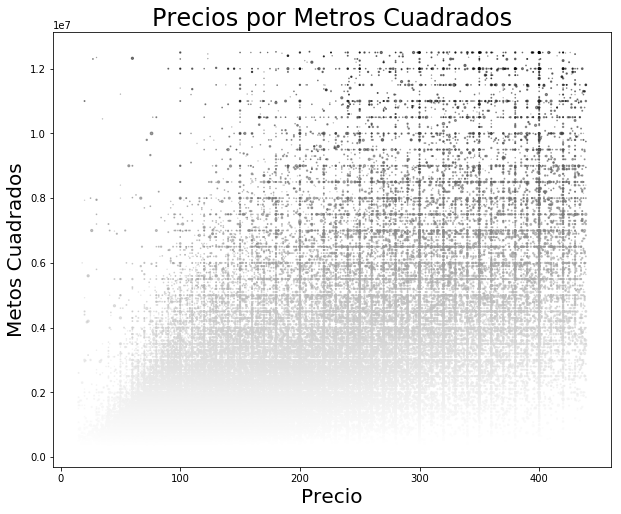

In [91]:

dfZP.plot.scatter( x='metroscubiertos', y='precio',s=dfZP['antiguedad'] * 0.1,alpha=0.5,  figsize=(10,8), c=dfZP['precio'])
plt.title('Precios por Metros Cuadrados', fontsize=24);
plt.xlabel('Precio', fontsize=20);
plt.ylabel('Metos Cuadrados', fontsize=20);

In [92]:
def valores_nulos(df):
    
    sum_null = df.isnull().sum()
    total = df.isnull().count()
    percent_nullvalues = 100* sum_null / total 
    
    print('Total',total)
    print('Null_Count',sum_null)
    print('Percent' ,round(percent_nullvalues,2))
    print(percent_nullvalues)
    
    df_null = pd.DataFrame()
    df_null['Total'] = total
    df_null['Null_Count'] = sum_null
    df_null['Percent'] = round(percent_nullvalues,2)
    df_null = df_null.sort_values(by='Null_Count',ascending = False)
    df_null = df_null[df_null.Null_Count > 0]
    
    return(df_null)

In [93]:
valores_nulos(dfZP)


Total id                            240000
titulo                        240000
descripcion                   240000
tipodepropiedad               240000
direccion                     240000
ciudad                        240000
provincia                     240000
antiguedad                    240000
habitaciones                  240000
garages                       240000
banos                         240000
metroscubiertos               240000
metrostotales                 240000
idzona                        240000
lat                           240000
lng                           240000
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
fecha_YYYY                    240000
fecha_MM                      240000
fecha_DD                      240000
fecha_dayofyear               24

,Total,Null_Count,Percent
lat,240000,123488,51.45
lng,240000,123488,51.45
direccion,240000,53072,22.11
metrostotales,240000,51467,21.44
idzona,240000,28621,11.93
metroscubiertos,240000,17400,7.25
titulo,240000,5387,2.24
descripcion,240000,1619,0.67
ciudad,240000,372,0.16
provincia,240000,155,0.06


In [94]:
def valoresNulos(columna):
    
    suma_null = columna.isnull().sum()
    total = columna.isnull().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    print (columna.name.ljust(30)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    return 


In [95]:
print ("Columna".ljust(30)+" Total       Cantidad Nulos    %Nulos ")
for col in dfZP.columns:
    valoresNulos(dfZP[col])
    #print(sum_null,total,percent_nullvalues)


Columna                        Total       Cantidad Nulos    %Nulos 
id                             240000                   0      0.00%
titulo                         240000                5387      2.24%
descripcion                    240000                1619      0.67%
tipodepropiedad                240000                  46      0.02%
direccion                      240000               53072     22.11%
ciudad                         240000                 372      0.16%
provincia                      240000                 155      0.06%
antiguedad                     240000                   0      0.00%
habitaciones                   240000                   0      0.00%
garages                        240000                   0      0.00%
banos                          240000                   0      0.00%
metroscubiertos                240000               17400      7.25%
metrostotales                  240000               51467     21.44%
idzona                         240

In [96]:
dfZP.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,piscina,escuelascercanas,centroscomercialescercanos,precio,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,0,2,1,...,0,0,0,2273000,2015,8,23,235,6,Sunday
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,0,1,1,3600000,2013,6,28,179,4,Friday
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,0,0,0,1200000,2015,10,17,290,5,Saturday
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,0,1,1,650000,2012,3,9,69,4,Friday
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,0,0,0,1150000,2016,6,7,159,1,Tuesday


In [97]:
dfZP[dfZP['tipodepropiedad'] == 'Apartamento']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,piscina,escuelascercanas,centroscomercialescercanos,precio,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,0,2,1,...,0,0,0,2273000,2015,8,23,235,6,Sunday
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,0,0,0,1150000,2016,6,7,159,1,Tuesday
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5,2,1,...,0,0,1,1100000,2014,3,18,77,1,Tuesday
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1,2,1,...,0,1,1,310000,2014,1,6,6,0,Monday
11,103293,"departamento en venta, san pedro garza garcia,...","departamento nuevo ,256 m2 de construccion,un ...",Apartamento,NaN,San Pedro Garza García,Nuevo León,0,3,2,...,0,0,0,7200000,2014,12,1,335,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239980,267455,departamentos en renta torres palmira,"departamento en venta avenida palmira , san lu...",Apartamento,NaN,San Luis Potosí,San luis Potosí,1,2,0,...,0,0,0,3386400,2016,12,3,338,5,Saturday
239986,41090,excelete torre de departamentos en lomas 4ta s...,<p>exclusiva torre de departamentos en venta e...,Apartamento,NaN,San Luis Potosí,San luis Potosí,0,3,2,...,0,0,0,2079000,2013,9,7,250,5,Saturday
239991,137337,departamento residencial coyuya,"departamento ubicado en planta baja, con excel...",Apartamento,Coyuya 200,Iztacalco,Distrito Federal,20,2,1,...,0,1,1,1450000,2015,3,14,73,5,Saturday
239997,131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20,2,1,...,0,0,0,3400000,2015,3,3,62,1,Tuesday


In [98]:
dfZP['total'] = 1

# Cantidad de Tipos de Propiedad Publicadas

In [99]:
dfTipodepropiedad = dfZP.groupby('tipodepropiedad').count()['total'].sort_values(ascending=False).to_frame()

In [100]:
dfTipodepropiedad

,total
tipodepropiedad,
Casa,141717
Apartamento,57341
Casa en condominio,19297
Terreno,9945
Local Comercial,3055
Oficina comercial,1741
Bodega comercial,1406
Edificio,1396
Terreno comercial,1326


In [127]:
dfTipodepropiedad_top10 = dfTipodepropiedad['total'].head(10)

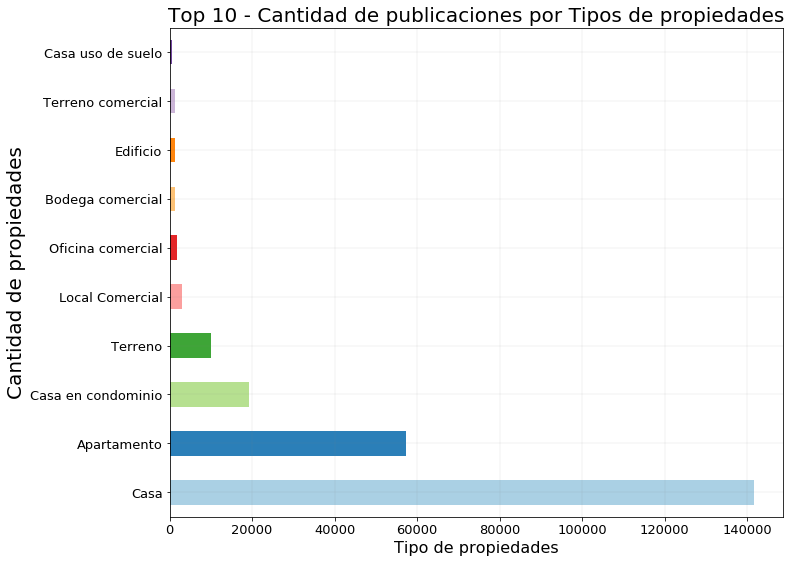

In [133]:
paired_colors = plt.cm.Paired(range(len(dfTipodepropiedad_top10)))

dfTipodepropiedad_top10.plot(kind='barh', rot=0, figsize=(11,9), color=paired_colors, alpha = 0.95 ,fontsize=13)
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.5)

plt.title('Top 10 - Cantidad de publicaciones por Tipos de propiedades', fontsize=20);
plt.xlabel('Tipo de propiedades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

Como es de esperarse la cantidad de publicaciones mayoritariamente son de Casas y Apartamentos.

# Provincias con más publicaciones

In [102]:
dfProvincia_grafico = dfZP.groupby('provincia').sum()['total'].sort_values(ascending=False).to_frame()

In [103]:
dfProvincia_grafico

,total
provincia,
Distrito Federal,58790
Edo. de México,41607
Jalisco,21238
Querétaro,16988
Nuevo León,15324
Puebla,10421
San luis Potosí,8447
Yucatán,7928
Morelos,7337


In [135]:
dfProvincia_grafico_top10 = dfProvincia_grafico['total'].nlargest(10)
dfProvincia_grafico_top10

provincia
Distrito Federal    58790
Edo. de México      41607
Jalisco             21238
Querétaro           16988
Nuevo León          15324
Puebla              10421
San luis Potosí      8447
Yucatán              7928
Morelos              7337
Veracruz             5762
Name: total, dtype: int64

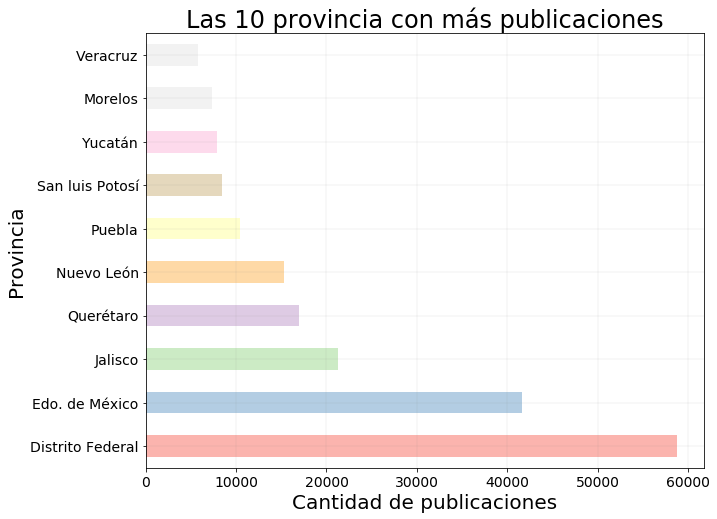

In [139]:
paired_colors = plt.cm.Pastel1(range(len(dfProvincia_grafico_top10)))

dfProvincia_grafico_top10.plot(kind='barh', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.5)
plt.title('Las 10 provincia con más publicaciones', fontsize=24);
plt.xlabel('Cantidad de publicaciones', fontsize=20);
plt.ylabel('Provincia', fontsize=20);

In [121]:
print (len(dfProvincia_grafico.head(10)))

10


El DF es la mayor cantidad de publicaciones y luego Estado de Mexico.

# Existen publicaciones duplicadas?

In [106]:
dfPublicacionesDuplicadas = dfZP.groupby(['titulo','tipodepropiedad','direccion','ciudad','provincia','antiguedad','precio']).count()['total'].to_frame()

In [107]:
dfPublicacionesDuplicadas = dfPublicacionesDuplicadas['total'].sort_values(ascending=False).to_frame()
dfPublicacionesDuplicadas[dfPublicacionesDuplicadas['total'] > 1]

,,,,,,,total
titulo,tipodepropiedad,direccion,ciudad,provincia,antiguedad,precio,
santa elena,Casa,santa elena,Cuautitlán,Edo. de México,10,490000,2
oriente 172 (av. emiliano zapata) - vendo casa,Casa,ORIENTE 172,Iztapalapa,Distrito Federal,20,4180000,2
"casa tlalnepantla, nezahualcoyotl",Casa,tlalnepantla,Nezahualcóyotl,Edo. de México,20,1150000,2
ex hacienda santa ines,Casa,santa ines,Nextlalpan,Edo. de México,5,330000,2
casa a 10 minutos del centro de cuernavaca,Casa,Ahuatepec,Cuernavaca,Morelos,1,660000,2


Al menos en esta primera observacion no vemos una cantidad importante de duplicados. Analizamos estas publicaciones pero no inciden en los resultados

In [108]:

dfZP[dfZP['titulo'] == 'oriente 172 (av. emiliano zapata) - vendo casa']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,escuelascercanas,centroscomercialescercanos,precio,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name,total
60753,74689,oriente 172 (av. emiliano zapata) - vendo casa,ubicadisima! en oriente 172 (continuación av. ...,Casa,ORIENTE 172,Iztapalapa,Distrito Federal,20,3,3,...,1,1,4180000,2016,5,3,124,1,Tuesday,1
108914,270103,oriente 172 (av. emiliano zapata) - vendo casa,ubicadisima! en oriente 172 (continuación av. ...,Casa,ORIENTE 172,Iztapalapa,Distrito Federal,20,3,3,...,1,1,4180000,2016,5,3,124,1,Tuesday,1


In [109]:
dfZP[dfZP['titulo'] == 'casa a 10 minutos del centro de cuernavaca']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,escuelascercanas,centroscomercialescercanos,precio,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name,total
135767,224380,casa a 10 minutos del centro de cuernavaca,<p>hermosa casa en venta. ubicada en ahuatepec...,Casa,Ahuatepec,Cuernavaca,Morelos,1,2,1,...,1,1,660000,2013,11,7,311,3,Thursday,1
159945,159676,casa a 10 minutos del centro de cuernavaca,<p>hermosa casa en venta. ubicada en ahuatepec...,Casa,Ahuatepec,Cuernavaca,Morelos,1,2,1,...,1,1,660000,2014,2,18,49,1,Tuesday,1


In [110]:
dfZP[dfZP['titulo'] == 'casa tlalnepantla, nezahualcoyotl']

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,escuelascercanas,centroscomercialescercanos,precio,fecha_YYYY,fecha_MM,fecha_DD,fecha_dayofyear,fecha_dayofweek,fecha_day_name,total
28448,169698,"casa tlalnepantla, nezahualcoyotl",planta baja. \nestacionamiento para 3 autos. \...,Casa,tlalnepantla,Nezahualcóyotl,Edo. de México,20,4,3,...,0,0,1150000,2014,8,9,221,5,Saturday,1
201711,6646,"casa tlalnepantla, nezahualcoyotl",características del inmueble: \nárea de terren...,Casa,tlalnepantla,Nezahualcóyotl,Edo. de México,20,4,3,...,0,0,1150000,2014,5,18,138,6,Sunday,1


# Analisis de fechas en publicaciones

## Cual es el dia que hay más publicaciones?

In [142]:
dfZP_weekday = dfZP.groupby(['fecha_dayofweek','fecha_day_name'])['total'].count().to_frame()


In [143]:
dfZP_weekday

,,total
fecha_dayofweek,fecha_day_name,
0,Monday,37899
1,Tuesday,41244
2,Wednesday,33736
3,Thursday,28220
4,Friday,43394
5,Saturday,30854
6,Sunday,24653


In [147]:
dfZP_weekday = dfZP_weekday.reset_index()
dfZP_weekday = dfZP_weekday.set_index('fecha_day_name').sort_values(['fecha_dayofweek'])
dfZP_weekday = dfZP_weekday.loc[:,'total']
dfZP_weekday

fecha_day_name
Monday       37899
Tuesday      41244
Wednesday    33736
Thursday     28220
Friday       43394
Saturday     30854
Sunday       24653
Name: total, dtype: int64

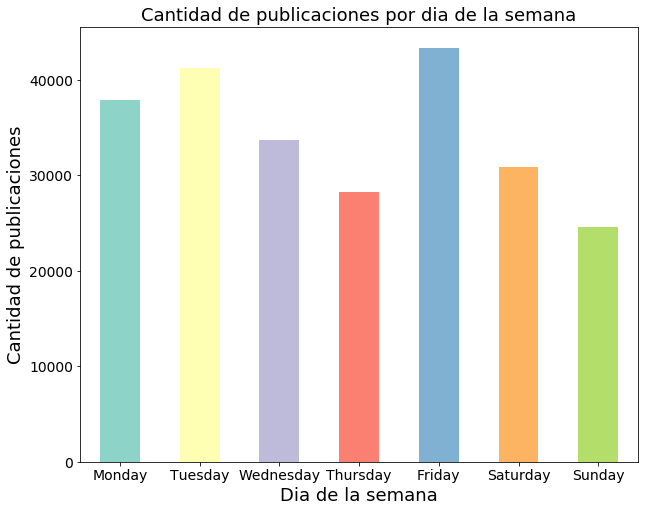

In [156]:
paired_colors = plt.cm.Set3(range(len(dfZP_weekday)))

dfZP_weekday.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)

plt.title('Cantidad de publicaciones por dia de la semana',fontsize=18);
plt.ylabel('Cantidad de publicaciones',fontsize=18);
plt.xlabel('Dia de la semana',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

Se observan los dias viernes los que tienen más publicaciones.

## Cual es el año que hay más publicaciones?


In [232]:
dfZP_fecha_YYYY = dfZP.groupby(['fecha_YYYY'])['total'].count()
dfZP_fecha_YYYY.to_frame()

,total
fecha_YYYY,
2012,23534
2013,30386
2014,40572
2015,51470
2016,94038


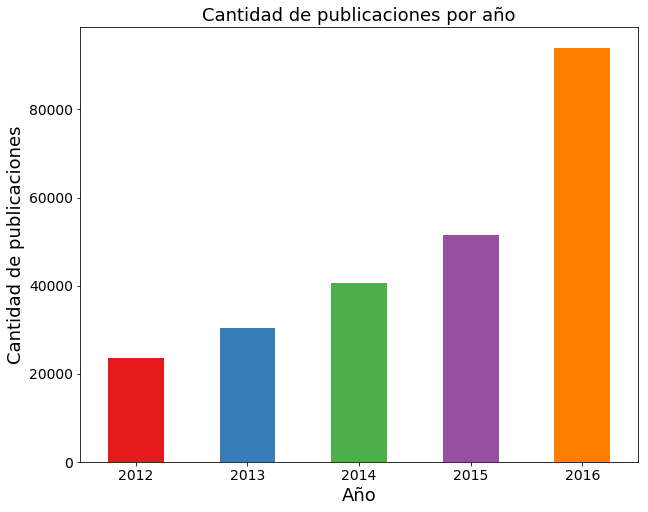

In [233]:
paired_colors = plt.cm.Set1(range(len(dfZP_fecha_YYYY)))

dfZP_fecha_YYYY.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)

plt.title('Cantidad de publicaciones por año',fontsize=18);
plt.ylabel('Cantidad de publicaciones',fontsize=18);
plt.xlabel('Año',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

Se observa como se incrementa la cantidad de publicaciones, lo cual demostraria un crecimiento en la plataforma.

## Cual es el mes que hay más publicaciones?


In [234]:
dfZP_fecha_MM = dfZP.groupby(['fecha_MM'])['total'].count()
dfZP_fecha_MM.to_frame()

,total
fecha_MM,
1,16009
2,13723
3,14732
4,16466
5,16062
6,17221
7,17510
8,20897
9,20622


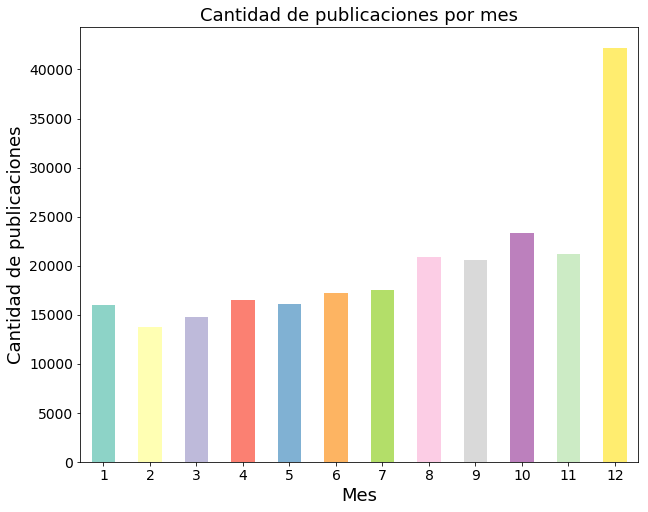

In [235]:
paired_colors = plt.cm.Set3(range(len(dfZP_fecha_MM)))

dfZP_fecha_MM.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)

plt.title('Cantidad de publicaciones por mes',fontsize=18);
plt.ylabel('Cantidad de publicaciones',fontsize=18);
plt.xlabel('Mes',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

## Como es la distribución por año y mes de las publicaciones?


In [226]:
dfZP_fecha_YYYYMM = dfZP.groupby(['fecha_YYYY','fecha_MM'])['total'].count().to_frame()
dfZP_fecha_YYYYMM

total
fecha_YYYY fecha_MM       
2012       1          1528
           2          1327
           3          1103
           4          1434
           5          1857
           6          1524
           7          1973
           8          3971
           9          2598
           10         3161
           11         1608
           12         1450
2013       1          1993
           2          1401
           3          1734
           4          1829
           5          2000
           6          2016
           7          2524
           8          2374
           9          3321
           10         4056
           11         4012
           12         3126
2014       1          2403
           2          2534
           3          2916
           4          2780
           5          3071
           6          3082
           7          3125
           8          3583
           9          3911
           10         3811
           11         4613
           12         4743
2015       1          4310
           2          3869
           3          3957
           4          3783
           5          3696
           6          3804
           7          3875
           8          4526
           9          4863
           10         5552
           11         4906
           12         4329
2016       1          5775
           2          4592
           3          5022
           4          6640
           5          5438
           6          6795
           7          6013
           8          6443
           9          5929
           10         6726
           11         6086
           12        28579

In [227]:
dfZP_fecha_YYYYMM.reset_index().sort_values(['fecha_YYYY','fecha_MM'])


,fecha_YYYY,fecha_MM,total
0,2012,1,1528
1,2012,2,1327
2,2012,3,1103
3,2012,4,1434
4,2012,5,1857
5,2012,6,1524
6,2012,7,1973
7,2012,8,3971
8,2012,9,2598
9,2012,10,3161


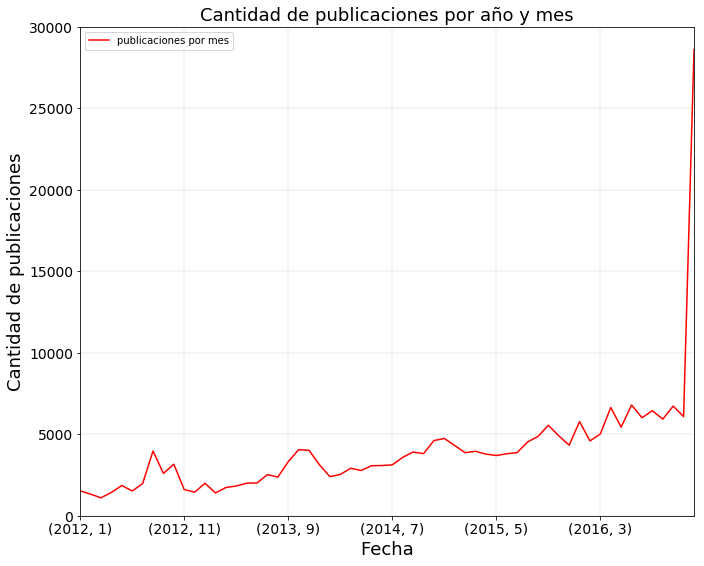

In [238]:
dfZP_fecha_YYYYMM.loc[:,'total'].plot(rot=0,figsize=(11,9),color='Red', fontsize=14,x_compat=True, ylim=(0, 30000))
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.8)
plt.title('Cantidad de publicaciones por año y mes',fontsize=18);
plt.ylabel('Cantidad de publicaciones',fontsize=18);
plt.xlabel('Fecha',fontsize=18);
plt.legend(['publicaciones por mes'], loc='upper left');
plt.show()

Se observa como de una manera creciente las publicaciones hasta el mes de Diciembre de 2016 donde se observa un gran salto en al cantidad de publicaciones.